<a href="https://colab.research.google.com/github/preekshitsaklani/mnist-vision/blob/main/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries

In [ ]:
import tensorflow
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

## Loading the Dataset

In [ ]:
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Data Shapes

In [ ]:
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


## Displaying an Image

1


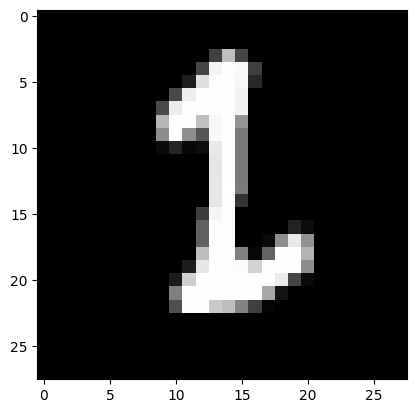

In [ ]:
plt.imshow(train_X[70], cmap = 'gray')
print(train_Y[70])

## Number of Classes

In [ ]:
num_classes = 10

## Normalizing the Data

In [ ]:
train_X = train_X/255
test_X = test_X/255

## Data Shape

In [ ]:
train_X[0].shape

(28, 28)

## Expanding Dimensions

In [ ]:
train_X = np.expand_dims(train_X, -1)
test_X = np.expand_dims(test_X, -1)

## New Data Shape

In [ ]:
train_X[0].shape

(28, 28, 1)

## Importing to_categorical

In [ ]:
from tensorflow.keras.utils import to_categorical

## One-Hot Encoding

In [ ]:
train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)

## Image Shape

In [ ]:
img_shape = (28, 28, 1)

## Importing Layers

In [ ]:
from keras import Sequential
from keras.layers import Dense

## Building the Model

In [ ]:
model = Sequential([
    keras.Input(shape = img_shape),
    keras.layers.Conv2D(20, kernel_size = (5, 5), strides = (2, 2), padding = 'valid', activation = 'relu'),
    keras.layers.Conv2D(40, kernel_size = (5, 5), strides = (2, 2), padding = 'valid', activation = 'relu'),
    keras.layers.Conv2D(80, kernel_size = (3, 3), strides = (2, 2), padding = 'valid', activation = 'relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(500, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax'),
])

## Model Summary

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 12, 12, 20)          │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 4, 4, 40)            │          20,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 1, 1, 80)            │          28,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 500)                 │          40,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,950 (370.90 KB)

 Trainable params: 94,950 (370.90 KB)

 Non-trainable params: 0 (0.00 B)

## Compiling the Model

In [ ]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Training the Model

In [ ]:
hist = model.fit(train_X, train_Y, batch_size = 100, epochs = 20, validation_split = 0.1)

Epoch 1/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.9946 - loss: 0.0154 - val_accuracy: 0.9863 - val_loss: 0.0636
Epoch 2/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9948 - loss: 0.0146 - val_accuracy: 0.9807 - val_loss: 0.0859
Epoch 3/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9963 - loss: 0.0110 - val_accuracy: 0.9855 - val_loss: 0.0656
Epoch 4/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9962 - loss: 0.0108 - val_accuracy: 0.9828 - val_loss: 0.0732
Epoch 5/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9953 - loss: 0.0137 - val_accuracy: 0.9852 - val_loss: 0.0616
Epoch 6/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9971 - loss: 0.0090 - val_accuracy: 0.9848 - val_loss: 0.0721
Epoch 7/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9966 - loss: 0.0092 - val_accuracy: 0.9837 - val_loss: 0.0721
Epoch 8/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9976 - loss: 0.0072 - 